<a href="https://colab.research.google.com/github/canisius-DAT512/Spring-23-Week-10/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation and Analysis
DAT 512 Canisius College
Adjunct Professor Paul Lambson

Learning Objectives
- Discuss customer insights and analytics
- Evaluate transactional data versus survey data
- Create metrics that reflect behavior
- Perform a customer segmentation

## Customer Analysis

**500 words on customer analysis from ChatGPT**

Customer analytics is a field of study that focuses on the analysis of customer behavior and purchasing patterns. It is the use of data and statistics to help companies better understand their customers, their needs, preferences, and behaviors. The origin of customer analytics dates back to the late 19th century when companies began using data to understand their customers better.

One of the earliest pioneers of customer analytics was Arthur C. Nielsen, who founded the Nielsen Company in 1923. The Nielsen Company became one of the first companies to use data to understand consumer behavior. Nielsen developed a method to track the sales of consumer goods and analyze the data to provide insights into consumer behavior.

In the 1930s, a statistician named William Edwards Deming developed a set of statistical methods that helped businesses to improve their quality control processes. Deming's work laid the foundation for the use of statistical methods in business and paved the way for customer analytics.

The rise of computers in the 1950s and 1960s marked a turning point in the history of customer analytics. With the development of computers and software, companies could store and analyze vast amounts of data. This led to the emergence of customer relationship management (CRM) systems, which allowed companies to track customer interactions and gather data on customer behavior.

The 1980s saw the emergence of database marketing, which involved the use of customer data to create targeted marketing campaigns. Companies could use data to identify customers who were likely to purchase their products and create personalized marketing messages for those customers.

In the 1990s, the rise of the internet led to a significant increase in the amount of data that companies could gather on their customers. Companies could track customers' online behavior, such as which products they viewed or added to their shopping carts. This led to the development of web analytics, which allowed companies to analyze customer behavior on their websites and optimize their online marketing efforts.

In recent years, the advent of big data and machine learning has transformed the field of customer analytics. Companies can now collect and analyze vast amounts of data from a variety of sources, including social media, mobile devices, and the Internet of Things (IoT). Machine learning algorithms can analyze this data and identify patterns and trends that would be difficult or impossible for humans to identify.

In conclusion, customer analytics has a long and rich history that dates back to the early 20th century. The field has evolved significantly over the years, from the early days of tracking sales data to the modern era of big data and machine learning. As companies continue to gather more data on their customers, customer analytics will continue to play a vital role in helping businesses to understand their customers and provide them with better products and services.



## What does a company know about you?
Discussion: 
- How does a company define a customer?
- What data points can they combine?
- What does combined data allow?

[Target's Predictive Pregnancy](https://www.nytimes.com/2012/02/19/magazine/shopping-habits.html?smid=url-share)

About a year after Pole created his pregnancy-prediction model, a man walked into a Target outside Minneapolis and demanded to see the manager. He was clutching coupons that had been sent to his daughter, and he was angry, according to an employee who participated in the conversation.

“My daughter got this in the mail!” he said. “She’s still in high school, and you’re sending her coupons for baby clothes and cribs? Are you trying to encourage her to get pregnant?”

The manager didn’t have any idea what the man was talking about. He looked at the mailer. Sure enough, it was addressed to the man’s daughter and contained advertisements for maternity clothing, nursery furniture and pictures of smiling infants. The manager apologized and then called a few days later to apologize again.

On the phone, though, the father was somewhat abashed. “I had a talk with my daughter,” he said. “It turns out there’s been some activities in my house I haven’t been completely aware of. She’s due in August. I owe you an apology.”

What do we know about The Look Customers?
Brainstom

1. ??
2. ??
3. ??

Go and find out those things


In [94]:
# authenticate with the google account used in console
from google.colab import auth
auth.authenticate_user()

In [95]:
import pandas as pd
project_id = 'tla-consultants'

# Example of a Customer Segmentation
1. [Gather customer attributes and normalize](https://colab.research.google.com/drive/14ND0HRqqmlNJ58WBOj4fslbysvzw0zIB#scrollTo=kRchiv8ig-R9&line=1&uniqifier=1)
2. [Combine data into single dataset](https://colab.research.google.com/drive/14ND0HRqqmlNJ58WBOj4fslbysvzw0zIB#scrollTo=HAE0e-_SJGy3&line=1&uniqifier=1)
3. [Determine optimal number of clusters](https://colab.research.google.com/drive/14ND0HRqqmlNJ58WBOj4fslbysvzw0zIB#scrollTo=JTHVex_jPfAK&line=1&uniqifier=1)
4. [Evaluate cluster characteristics](https://colab.research.google.com/drive/14ND0HRqqmlNJ58WBOj4fslbysvzw0zIB#scrollTo=MOmTyXsSiAZJ&line=1&uniqifier=1) 
5. [Define psuedonyms for clusters](https://colab.research.google.com/drive/14ND0HRqqmlNJ58WBOj4fslbysvzw0zIB#scrollTo=ob4dg6ItiNny&line=1&uniqifier=1)

## 1.Gather customer attributes

### User Purchase Counts

In [98]:
sql = '''
SELECT 
  user_id,
  count(*) order_count 
FROM `bigquery-public-data.thelook_ecommerce.orders` 
where status not in ('Returned','Cancelled')
group by 1
'''

user_order_count = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [99]:
user_order_count.value_counts()

order_count
1              46133
2              14477
3               4088
4               1587
dtype: int64

In [100]:
user_orders = pd.get_dummies(user_order_count['order_count'],prefix='orders')

### User Product Purchase History

In [101]:
sql = '''
SELECT
  user_id,
  p.category,
  COUNT(*) purchase_count
FROM
  `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN
  `bigquery-public-data.thelook_ecommerce.products` p
ON
  oi.product_id = p.id
WHERE
  status NOT IN ('Returned','Cancelled')
GROUP BY 1,2
'''

user_products_cat = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [102]:
user_products_cat.head()

,category,purchase_count
user_id,,
31926,Clothing Sets,1
93599,Clothing Sets,1
98633,Clothing Sets,1
15894,Clothing Sets,1
74802,Clothing Sets,1


In [107]:
user_products_cat.index.nunique()

66285

In [221]:
user_categories = pd.get_dummies(user_products_cat['category'],prefix='cat').groupby('user_id').max()

### User Demo

In [110]:
sql = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.users`
'''

user_demo = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [22]:
user_demo.head()

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
id,,,,,,,,,,,,,,
20548,Gilbert,Matthews,gilbertmatthews@example.net,54,M,Acre,160 Young Ridge,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2019-03-09 14:49:00+00:00
22628,Charles,Ford,charlesford@example.org,42,M,Acre,626 Clark Point Apt. 167,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2021-09-26 03:14:00+00:00
25262,Kathy,Torres,kathytorres@example.com,36,F,Acre,8033 Jeffrey Fields Suite 569,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2019-09-01 14:50:00+00:00
36344,Andrew,Lucero,andrewlucero@example.com,42,M,Acre,89439 Moore Shoals Apt. 333,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-10-07 10:16:00+00:00
36911,Susan,Young,susanyoung@example.com,53,F,Acre,5362 Harris Branch Apt. 127,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-09-03 01:26:00+00:00


In [222]:
user_country = pd.get_dummies(user_demo['country'],prefix='country')

In [223]:
user_gender = pd.get_dummies(user_demo['gender'],prefix='sex')

In [224]:
user_age = pd.get_dummies(pd.qcut(user_demo['age'], q = 5, labels = range(5)),prefix='age')

In [225]:
user_traffic = pd.get_dummies(user_demo['traffic_source'],prefix='traffic')

### Web Traffic

In [114]:
sql = '''
SELECT
  user_id,
  SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) num_purchase,
  SUM(CASE WHEN event_type = 'cart' THEN 1 ELSE 0 END) num_cart,
  SUM(CASE WHEN event_type = 'product' THEN 1 ELSE 0 END) num_product,
  COUNT(*) all_events
FROM
  `bigquery-public-data.thelook_ecommerce.events`
WHERE
  user_id IS NOT NULL
GROUP BY
  1
'''

user_web = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [115]:
user_web.head()

,num_purchase,num_cart,num_product,all_events
user_id,,,,
3101,6,20,20,66
96289,6,20,20,66
56737,9,25,25,85
23841,8,22,22,76
83651,6,12,12,45


In [116]:
user_web['event_per_purchase'] = round(user_web['all_events']/user_web['num_purchase'])
user_web['event_per_purchase'].value_counts().sort_index()

5.0     48033
6.0      9028
7.0     11483
8.0      1311
9.0      1971
10.0     3904
11.0     1942
12.0      143
13.0     2533
Name: event_per_purchase, dtype: Int64

In [117]:
user_events_per_purchase = pd.get_dummies(pd.qcut(user_web['event_per_purchase'],q=4,labels=range(2),duplicates='drop'),prefix='events_per_purchase')

In [118]:
user_web['avg_cart_size'] = round(user_web['num_cart']/user_web['num_purchase'])
user_web['avg_cart_size'].value_counts()

1.0    49383
2.0    21912
3.0     6377
4.0     2676
Name: avg_cart_size, dtype: Int64

In [119]:
user_avg_cart_size = pd.get_dummies((user_web['avg_cart_size']),prefix = 'avg_cart_size')

## 2.Combine Data

In [133]:
dfs = [user_orders,
       user_categories,
       user_country,
       user_gender,
       user_age,
       user_traffic,
       user_events_per_purchase,
       user_avg_cart_size]
for df in dfs:
  print(df.shape)

(66285, 4)
(66285, 26)
(100000, 16)
(100000, 2)
(100000, 5)
(100000, 5)
(80348, 2)
(80348, 4)


In [226]:
user_all = user_country.join(user_categories,how='left').\
join(user_orders,how='left').\
join(user_gender).join(user_age).join(user_traffic).\
join(user_events_per_purchase,how='left').\
join(user_avg_cart_size,how='left')

In [173]:
user_all.shape

(100000, 64)

In [227]:
user_all.mean()

country_Australia        0.021320
country_Austria          0.000010
country_Belgium          0.012680
country_Brasil           0.144910
country_China            0.339050
                           ...   
events_per_purchase_1    0.146911
avg_cart_size_1.0        0.614614
avg_cart_size_2.0        0.272714
avg_cart_size_3.0        0.079367
avg_cart_size_4.0        0.033305
Length: 63, dtype: float64

In [228]:
user_all.dropna(inplace=True)

In [229]:
user_all.shape

(66285, 63)

## 3.Determine Optimal Number of Clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

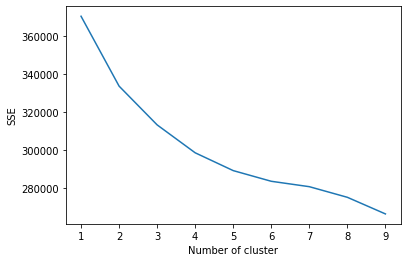

In [230]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_all)
    #user_all["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [231]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(user_all)
user_all["clusters"] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4.Examine Cluster Charactaristics

In [232]:
cluster_means = user_all.groupby('clusters').mean()

In [197]:
cluster_means

,Australia,Austria,Belgium,Brasil,China,Colombia,Deutschland,España,France,Germany,...,Email,Facebook,Organic,Search,events_per_purchase_0,events_per_purchase_1,avg_cart_size_1.0,avg_cart_size_2.0,avg_cart_size_3.0,avg_cart_size_4.0
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.022802,0.000000,0.012109,0.143183,0.338968,0.000236,0.000000,0.000000,0.047964,0.040337,...,0.050794,0.059601,0.147586,0.701211,1.0,0.0,0.535226,0.464774,0.000000,0.000000
1,0.021013,0.000139,0.012877,0.142950,0.341453,0.000046,0.000046,0.000046,0.049742,0.041281,...,0.052531,0.059783,0.148622,0.698340,1.0,0.0,0.758449,0.241551,0.000000,0.000000
2,0.022880,0.000000,0.012221,0.143802,0.337729,0.000092,0.000046,0.000046,0.049481,0.044197,...,0.051962,0.061242,0.151107,0.699210,1.0,0.0,0.765046,0.234954,0.000000,0.000000
3,0.021574,0.000000,0.012536,0.146550,0.342468,0.000097,0.000000,0.000097,0.045967,0.042177,...,0.045092,0.062585,0.150729,0.701555,0.0,1.0,0.000000,0.258115,0.543926,0.197959


In [198]:
user_all.mean()

Australia            0.022056
Austria              0.000045
Belgium              0.012461
Brasil               0.143833
China                0.339911
                       ...   
avg_cart_size_1.0    0.600045
avg_cart_size_2.0    0.284785
avg_cart_size_3.0    0.084438
avg_cart_size_4.0    0.030731
clusters             1.446979
Length: 65, dtype: float64

In [233]:
percent_diff = cluster_means/user_all.mean()-1
percent_diff = percent_diff.T

In [234]:
print(percent_diff.to_string())

clusters                                  0         1         2         3
age_0                              0.020819  0.016937 -0.009412 -0.020227
age_1                              0.011289 -0.011379 -0.004858  0.019230
age_2                             -0.002068 -0.033475  0.032945 -0.010859
age_3                             -0.033813  0.024897 -0.011261  0.004702
age_4                              0.003758  0.000918 -0.007645  0.010736
avg_cart_size_1.0                 -1.000000  0.666541  0.327150 -1.000000
avg_cart_size_2.0                  0.855496 -1.000000 -0.284901  1.505778
avg_cart_size_3.0                  3.092688 -1.000000 -1.000000  1.487910
avg_cart_size_4.0                  3.100159 -1.000000 -1.000000  1.483354
cat_Accessories                    1.066569 -0.441572 -0.141156  0.273749
cat_Active                         1.086934 -0.427833 -0.181561  0.316924
cat_Blazers & Jackets             -1.000000  0.362500 -1.000000  1.952276
cat_Clothing Sets                 -1.0

## 5.Define Psuedonyms

In [238]:
cluster_names = {0:'male fb shopper',
                 1:'women barely be shopping',
                 2:'australian men love pants',
                 3:'fancy spanish ladies'
                 }

In [239]:
user_all['clusters'].replace(cluster_names)

id
9682     australian men love pants
28669         fancy spanish ladies
44370     women barely be shopping
46250         fancy spanish ladies
62143     women barely be shopping
                   ...            
35231         fancy spanish ladies
71491         fancy spanish ladies
6744     australian men love pants
69788     women barely be shopping
96700    australian men love pants
Name: clusters, Length: 66285, dtype: object